In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mninst = keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mninst.load_data()


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape
X_test.shape

(10000, 28, 28)

In [5]:
X_train, X_test=X_train/255.0, X_test/255.0
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [6]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [8]:
model=keras.Sequential([
    
    # first layer : 32 filter : 3x3 ReLU activation -> POOLING

    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # second layer : 64 filter : 3x3 RELU -> 2x2 POOL

    keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # (optional) 128 filter : 2x2 POOL
    # Flatten 

    keras.layers.Flatten(),

    # Fully Connected Layer 128 neurons ReLU

    keras.layers.Dense(128,activation="relu"),

    # outout layer

    keras.layers.Dense(10,activation="softmax"),


])

model.summary()

c:\Users\Faruk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test,y_test))
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9604 - loss: 0.1309 - val_accuracy: 0.9869 - val_loss: 0.0442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 0.9895 - val_loss: 0.0324
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9890 - val_loss: 0.0342
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9904 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9903 - val_loss: 0.0319
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0319


0.9902999997138977

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
8


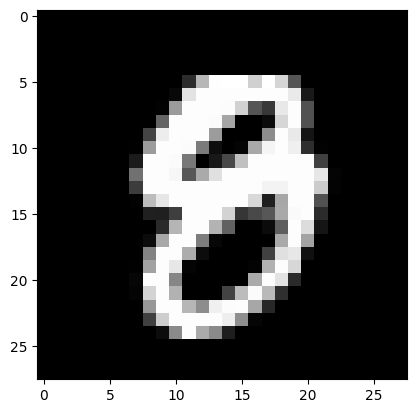

In [20]:
test_image = X_test[7569].reshape(1,28,28,1)
predict = model.predict(test_image)
predicted_digit = np.argmax(predict)

plt.imshow(test_image[0],cmap="gray")
plt.show

print(predicted_digit)